<a href="https://colab.research.google.com/github/Tiwari666/NLP_MODEL/blob/main/LLMs_Restaurant_Review_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Install Required Libraries
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


This command installs three Python libraries: transformers, datasets, and torch, so we can use them in our code for data analysis.

--transformers (Library): Tools for pre-trained language models like GPT and BERT.
Use: Text generation, sentiment analysis.

--datasets (Library): Tools for accessing and managing datasets.
Use: Load datasets like IMDB, Wikipedia.
Note: datasets (Library) is used to access online datasets. If you load the data yourself, you don't need it.

--torch (Library/Framework): PyTorch, a framework for deep learning.
Use: Train AI models, perform computations.


$$$$$$$$$$$$$$$$$$$$
---PyTorch's Role: PyTorch offers a flexible and dynamic environment for building and training deep learning models. It provides core functionalities like:

---Tensor operations: Efficient manipulation of multi-dimensional arrays (tensors).

---Automatic differentiation: Automatic computation of gradients, crucial for training neural networks.

---Neural network building blocks: Pre-built layers like convolutional layers, recurrent layers, etc.

---GPU acceleration: Support for running computations on GPUs for faster training.

Note:
---In simple terms, a GPU is like a supercomputer for pictures.

---It's designed to handle lots of calculations at once, which is perfect for things like creating images and videos.

---Deep learning models also need to do tons of calculations, so GPUs are great for training these models quickly.



----Think of it this way: if your CPU is like a really fast car for one person, a GPU is like a huge bus that can carry a whole bunch of people at the same time!



In [4]:
# Step 2: Load the Data
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')
print(data.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


**# Step 3: Preprocess the Data (Tokenization)**

In [5]:
# Step 3: Preprocess the Data (Tokenization)
from transformers import GPT2Tokenizer

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set padding token for tokenizer

# Set padding token in the model's configuration
from transformers import AutoModelForSequenceClassification
model_name = "gpt2"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Set padding token in the model's configuration
model.config.pad_token_id = tokenizer.eos_token_id  # Define padding token for model config

# Tokenize the data
encodings = tokenizer(data['Review'].tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### from transformers import GPT2Tokenizer

--transformers: Library
--A collection of tools for working with language models like GPT-2.

--GPT2Tokenizer: Class
--A blueprint for creating a tokenizer that processes text for GPT-2.

### tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

--GPT2Tokenizer.from_pretrained(): Class Method/Function---
A function from the GPT2Tokenizer class that loads a pre-trained tokenizer for GPT-2.

---"gpt2": Parameter---
Specifies which model's tokenizer to load (GPT-2 in this case).

---tokenizer is an object, why?.

----a) GPT2Tokenizer is a class in the transformers library.

---b) from_pretrained("gpt2") is a class method that creates an instance (object) of the GPT2Tokenizer class.

---c) The result of this method (tokenizer) is the object.


--Advantages of Creating an Object (Short and Sweet):

a) Encapsulation: Combines data (e.g., pad_token) and behavior (e.g., tokenizer.encode()) in one place.

b) Reusability: Use the same tokenizer object to process multiple texts.

c) Customization: Tailored for GPT-2, ensuring tokenization aligns with the model's requirements.

d) Readability: Keeps the code clean and organized.

e) Modularity: Allows creating multiple independent tokenizers for different configurations ("gpt2" model, "bert-base-uncased" model).

--Note: gpt2" and "bert-base-uncased" are pre-trained models. These are ready-to-use AI models trained on massive datasets to perform language-related tasks (like text generation, sentiment analysis, etc.).


--Padding adds extra tokens (like blank spaces) to make all sentences the same length, so the model can process them together efficiently.

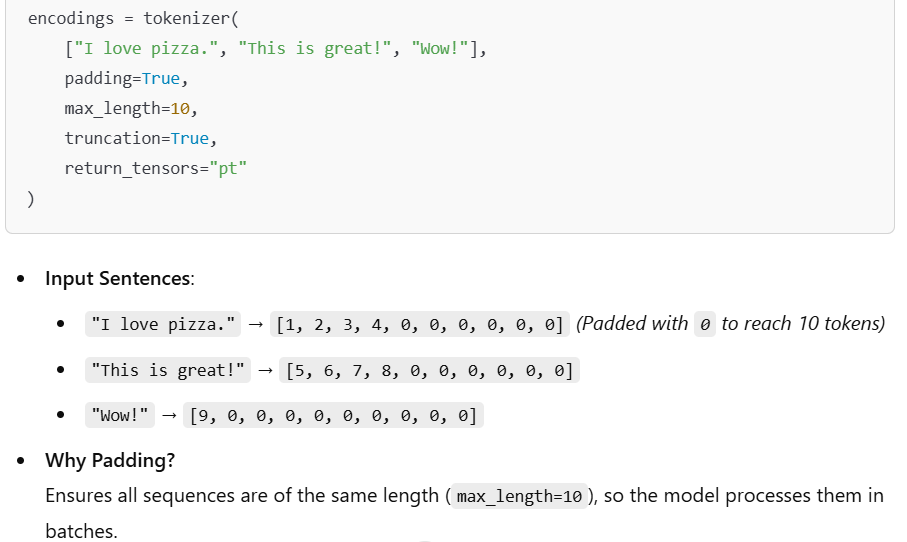





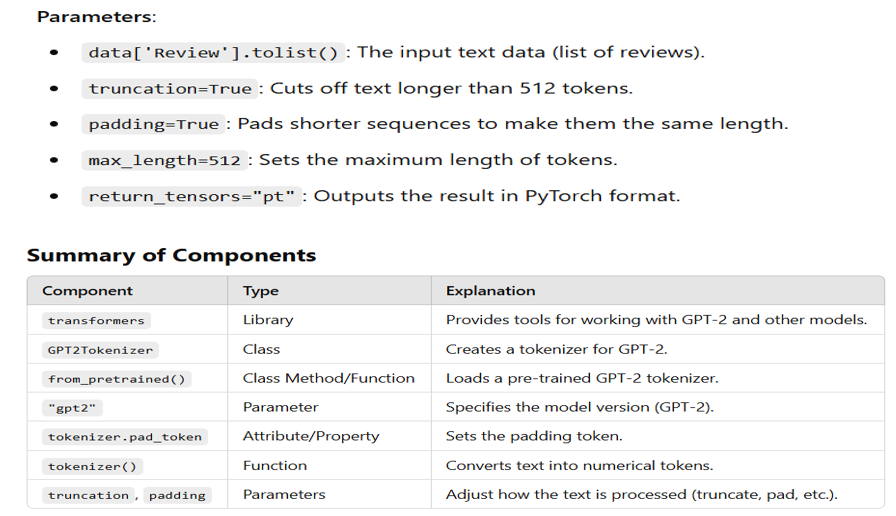

If you remove .tolist() from the line:
encodings = tokenizer(data['Review'], truncation=True, padding=True, max_length=512, return_tensors="pt"),

the default data structure of the output will likely be a pandas Series or a NumPy array, depending on the data type of data['Review'].

Tokenizer Input Expectation: The tokenizer function from the Hugging Face Transformers library generally expects a list of strings as input.

**Step 4: Convert Encodings to PyTorch Tensors**

In [6]:
# Step 4: Convert Encodings to PyTorch Tensors
import torch

# Extract input_ids and attention_mask
input_ids = torch.tensor(encodings['input_ids'])
attention_mask = torch.tensor(encodings['attention_mask'])
labels = torch.tensor(data['Liked'].values)  # Here, 'Liked' is the target label (0 or 1)

# Create PyTorch datasets
dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, labels)

<ipython-input-6-5828af2cf724>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(encodings['input_ids'])
<ipython-input-6-5828af2cf724>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(encodings['attention_mask'])


In [7]:
# Split into train and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

The above step (4) code snippet prepares the tokenized text data for training a deep learning model in PyTorch.

It extracts the **input_ids** and **attention_mask** from the encodings dictionary, converting them into PyTorch tensors along with the corresponding labels.

These tensors are then combined into a torch.utils.data.TensorDataset, creating a structured data source for the model.

Finally, the dataset is split into training and validation sets using torch.utils.data.random_split, ensuring that the model is trained on a portion of the data and evaluated on a separate, unseen portion to prevent overfitting.
This organized data structure is crucial for efficient and effective model training in PyTorch.

**# Step 5: Create Data Loaders**

Data loaders are used to efficiently batch and shuffle the data during training. creating data loaders for both the training and validation datasets.

In [8]:
# Step 5: Create Data Loaders
from torch.utils.data import DataLoader

# Create data loaders: Use torch.utils.data.DataLoader to create data loaders for efficient batching and shuffling during training.
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

DataLoaders in PyTorch are essential for efficient and robust training. They provide a mechanism to fetch data in batches from your datasets, improving memory usage and training speed.

 By shuffling the training data within each epoch, DataLoaders help prevent overfitting and ensure the model sees a diverse range of examples.

 Additionally, they offer flexibility for implementing custom data augmentation or preprocessing steps during the data loading process, further enhancing the training process.

In essence, DataLoaders streamline data handling in PyTorch, making training more efficient and robust.

**Step 6: : Load Pre-trained Model**
I load a pre-trained model. Here, you're using the GPT-2 model for sequence classification, with the number of labels set to 2 (binary classification).

A) Choose a Model Architecture: Select a suitable model architecture for sentiment analysis. Popular choices include:

--Pre-trained Transformers:
I) BERT (Bidirectional Encoder Representations from Transformers) :model_name = "bert-base-uncased"  # Original BERT

II) RoBERTa (A Robustly Optimized BERT Approach) : model_name = "roberta-base"

III) DistilBERT (A distilled version of BERT): model_name = "distilbert-base-uncased"

IV) GPT-2 (Generative Pre-trained Transformer 2): model_name = "gpt2"

B) Load the Model: Load the chosen pre-trained model from the transformers library.

**# Step 6a: Define the Model and Tokenizer**

In [9]:
from transformers import AutoModelForSequenceClassification, GPT2Tokenizer

# Load GPT-2 model and tokenizer
model_name = "gpt2"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Initialize tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set padding token for tokenizer

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Step 6b: Set Padding Token in the Model Configuration and Define Loss Function & Optimizer**




In [10]:
from transformers import AdamW

# Set padding token in the model's configuration
model.config.pad_token_id = tokenizer.eos_token_id  # Define padding token for model config

# Set up optimizer and loss function
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)  # Adjust learning rate as needed

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Explanation**

**AutoModelForSequenceClassification:**  This class from the transformers library provides a convenient way to load pre-trained models fine-tuned for sequence classification tasks (like sentiment analysis).

**model_name:** This variable holds the name of the pre-trained model you want to use.

**from_pretrained(model_name, num_labels=2):** This line loads the pre-trained model weights from the Hugging Face Model Hub using the specified model_name. You may need to adjust num_labels if your classification task has more than two classes.

**num_labels=2**  indicates that the model is being fine-tuned for a binary classification task (e.g., positive/negative sentiment).

By changing the model_name variable, you can easily switch between different pre-trained models for your sequence classification task.

**Define the Loss Function and Optimizer**

Loss Function: Use torch.nn.CrossEntropyLoss for binary classification.

Optimizer: Choose an optimizer like AdamW.

tools = functions/algorithms

**torch = framework**

The loss_fn (CrossEntropyLoss) defines a mathematical function to measure the discrepancy between the model's predictions and the actual labels.

The optimizer (AdamW) is an algorithm that efficiently updates the model's parameters to minimize the loss function, effectively guiding the model towards better performance.



**torch.nn:** This part refers to the nn **module** in PyTorch. The nn module provides a collection of classes and functions for building and training neural networks(nn).

**CrossEntropyLoss():** This is the specific **class** within the nn module. CrossEntropyLoss is a loss function commonly used in classification tasks.

**Classification:** In classification problems, the model predicts the probability of an input belonging to each class.

**Cross-Entropy:** This loss function measures the difference between the predicted probability distribution and the actual class (the true label).

**Conclusion:**

**torch.nn.CrossEntropyLoss()** creates an object that can be used to calculate the loss between the model's predicted class probabilities and the true class labels during training.

**Step 7: Training and Validation Loop**



**Train the Model**
The model is trained over multiple epochs, and for each epoch, the loss is computed and backpropagated. After each batch, the optimizer is updated. You also have a validation loop to evaluate the model after each epoch.

Training Loop: Iterate through the training dataset, forward pass the inputs to the model, compute the loss, backpropagate the gradients, and update the model's parameters.

Validation Loop: Evaluate the model's performance on the validation set after each epoch to monitor progress and prevent overfitting.

In [13]:
# Training Loop

num_epochs = 3  # Adjust as needed

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)  # Forward pass
        logits = outputs.logits  # Assuming logits are the model's output
        loss = loss_fn(logits, labels)  # Compute loss
        loss.backward()  # Backpropagate loss
        optimizer.step()  # Update optimizer
        optimizer.zero_grad()  # Reset gradients

    # Validation loop
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    correct_predictions = 0
    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch
        with torch.no_grad():  # No gradients are needed for evaluation
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        total_loss += loss_fn(logits, labels).item()
        _, predicted = torch.max(logits, dim=1)
        correct_predictions += (predicted == labels).sum().item()

    # Calculate validation loss and accuracy
    val_loss = total_loss / len(val_dataloader)
    val_accuracy = correct_predictions / len(val_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")



Epoch 1/3, Val Loss: 0.1719, Val Accuracy: 0.9300
Epoch 2/3, Val Loss: 0.2275, Val Accuracy: 0.9250
Epoch 3/3, Val Loss: 0.1922, Val Accuracy: 0.9400


**Step 8: Final Model and Prediction**

After training, we can save the model and make predictions on new data.

In [14]:
# Save the trained model
model.save_pretrained('./trained_gpt2_model')
tokenizer.save_pretrained('./trained_gpt2_model')

('./trained_gpt2_model/tokenizer_config.json',
 './trained_gpt2_model/special_tokens_map.json',
 './trained_gpt2_model/vocab.json',
 './trained_gpt2_model/merges.txt',
 './trained_gpt2_model/added_tokens.json')

In [15]:
# Predict on new data
model.eval()
new_reviews = ["Great food!", "Terrible experience."]
encodings_new = tokenizer(new_reviews, truncation=True, padding=True, max_length=512, return_tensors="pt")
input_ids_new = torch.tensor(encodings_new['input_ids'])
attention_mask_new = torch.tensor(encodings_new['attention_mask'])

with torch.no_grad():
    outputs = model(input_ids_new, attention_mask=attention_mask_new)
    logits_new = outputs.logits
    predictions = torch.argmax(logits_new, dim=1)
    print("Predictions:", predictions)


Predictions: tensor([1, 0])


<ipython-input-15-e08346e4e98e>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids_new = torch.tensor(encodings_new['input_ids'])
<ipython-input-15-e08346e4e98e>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask_new = torch.tensor(encodings_new['attention_mask'])


# **Interpreting the result:**

The code  running above is using the trained model to predict the sentiment of two new reviews: "Great food!" and "Terrible experience."

**Predictions: tensor([1, 0])**

--This output means:

--1 for "Great food!": The model predicts that this review is positive (class 1).

--0 for "Terrible experience.": The model predicts that this review is negative (class 0).



In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels_list = []
predictions_list = []

# Set the model to evaluation mode
model.eval()

# Loop through the validation or test dataset
for batch in val_dataloader:  # or use test_dataloader if you're testing
    input_ids, attention_mask, labels = batch

    # Make predictions
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        # Store the true labels and predictions
        true_labels_list.extend(labels.numpy())  # convert to numpy for easy comparison
        predictions_list.extend(predictions.numpy())

# Convert lists to numpy arrays
true_labels_array = np.array(true_labels_list)
predictions_array = np.array(predictions_list)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels_array, predictions_array)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[99  6]
 [ 6 89]]


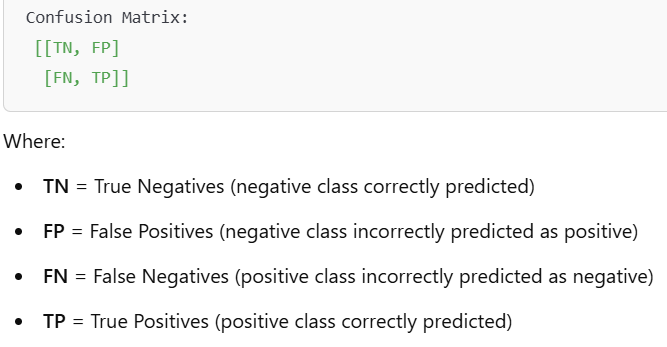

**Interpretation of the Confusion Matrix:**

a) **True Positives (TP) = 99:** These are the positive reviews that the model correctly predicted as positive.

b) **False Positives (FP) = 6:** These are the negative reviews that the model incorrectly predicted as positive.

c) **False Negatives (FN) = 6:** These are the positive reviews that the model incorrectly predicted as negative.

d) **True Negatives (TN) = 89:** These are the negative reviews that the model correctly predicted as negative.

**In Business Terms:**

**True Positives (TP) - 99:**

These are the positive reviews that the model identified correctly. In a business context, these are reviews that are correctly classified as positive. The model is performing well here by recognizing the positive sentiment, which is good for promoting customer satisfaction and feedback.

**False Positives (FP) - 6:**

These are negative reviews that were incorrectly identified as positive. In business terms, these are cases where negative customer experiences are incorrectly classified as positive. This can lead to false insights and misguidance in customer feedback analysis, as the model wrongly believes these customers had a positive experience.

**False Negatives (FN) - 6:**

These are positive reviews that were incorrectly identified as negative. This means that positive customer feedback was overlooked. In a business context, this is a missed opportunity where the model fails to recognize happy customers, which could affect customer satisfaction scores or marketing efforts.

**True Negatives (TN) - 89:**

These are negative reviews that were correctly identified as negative. This means the model is accurately identifying dissatisfied customers, allowing the business to address issues and improve customer experiences.

**Overall Business Implication:**

The model is performing well because it has a high number of true positives (99) and true negatives (89).

False positives (6) and false negatives (6) are relatively low, which indicates that the model is fairly accurate at identifying both positive and negative reviews, but there is still room for improvement, particularly in identifying negative feedback as positive and identifying positive feedback as negative.


In summary, this model is helping the business accurately identify customer satisfaction (positive or negative) but may need some fine-tuning to reduce errors in predicting customer sentiments.

# **Next Steps:**

**Hyperparameter Tuning:** We can experiment with different learning rates, batch sizes, and epochs to improve model performance.

**Data Augmentation** : Consider augmenting our training data to add more variation for better generalization.

**Model Improvements:** If performance is not satisfactory, you might explore other models like BERT, RoBERTa, or DistilBERT, which are also commonly used for text classification tasks.

**Data augmentation** is a technique used to artificially increase the amount of data available for training a model by making small changes to existing data, while still keeping the original meaning. For text data, this can include replacing words with their synonyms, changing the sentence structure, or even translating the text into another language and back to generate new variations. For example, if you have a review that says "The food was amazing," data augmentation might create new versions like "The meal was incredible" (synonym replacement) or "The food was absolutely great" (random insertion). This helps improve the model's ability to handle different types of input and increases its accuracy by giving it more examples to learn from.